# Exploring the Bitcoin Cryptocurrency Market

Explore the market capitalization of Bitcoin and other cryptocurrencies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Importing file coinmarketcap 2017

In [2]:
dec6 = pd.read_csv('datasets\coinmarketcap_06122017.csv')

In [3]:
len(dec6)

1326

In [4]:
dec6.shape

(1326, 16)

In [5]:
dec6.head(3)

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,16723525.0,bitcoin,1512549554,2.130493e+11,21000000.0,Bitcoin,0.12,7.33,17.45,1.000000,12739.500,1,BTC,16723525.0
1,1,1.551330e+09,96165368.0,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652,2,ETH,96165368.0
2,2,1.111350e+09,16840438.0,bitcoin-cash,1512549578,2.529585e+10,21000000.0,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090,3,BCH,16840438.0


In [6]:
dec6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1326 non-null   int64  
 1   24h_volume_usd      1270 non-null   float64
 2   available_supply    1031 non-null   float64
 3   id                  1326 non-null   object 
 4   last_updated        1326 non-null   int64  
 5   market_cap_usd      1031 non-null   float64
 6   max_supply          215 non-null    float64
 7   name                1326 non-null   object 
 8   percent_change_1h   1273 non-null   float64
 9   percent_change_24h  1270 non-null   float64
 10  percent_change_7d   1283 non-null   float64
 11  price_btc           1326 non-null   float64
 12  price_usd           1326 non-null   float64
 13  rank                1326 non-null   int64  
 14  symbol              1326 non-null   object 
 15  total_supply        1211 non-null   float64
dtypes: flo

In [7]:
dec6.isnull().sum()

Unnamed: 0               0
24h_volume_usd          56
available_supply       295
id                       0
last_updated             0
market_cap_usd         295
max_supply            1111
name                     0
percent_change_1h       53
percent_change_24h      56
percent_change_7d       43
price_btc                0
price_usd                0
rank                     0
symbol                   0
total_supply           115
dtype: int64

In [8]:
dec6.columns

Index(['Unnamed: 0', '24h_volume_usd', 'available_supply', 'id',
       'last_updated', 'market_cap_usd', 'max_supply', 'name',
       'percent_change_1h', 'percent_change_24h', 'percent_change_7d',
       'price_btc', 'price_usd', 'rank', 'symbol', 'total_supply'],
      dtype='object')

## 1- Full dataset filtering and reproducibility

In [9]:
market_cap_raw = dec6[['id','market_cap_usd']]

In [10]:
market_cap_raw.agg('count')

id                1326
market_cap_usd    1031
dtype: int64

### 2- Discarding the Cryptocurrencies without a market capitalization

In [11]:
cap = market_cap_raw.query('market_cap_usd > 0')

In [12]:
cap.agg(["count"])

,id,market_cap_usd
count,1031,1031


In [13]:
cap

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
...,...,...
1026,future-digital-currency,2.510000e+02
1027,environ,1.360000e+02
1028,caliphcoin,1.000000e+02
1029,falcoin,2.300000e+01


### 3- How big is Bitcoin compared with the rest of the cryptocurrencies

In [14]:
cap10 = market_cap_raw.iloc[:10].set_index('id').sort_index()

In [15]:
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / x.market_cap_usd.sum()) * 100)

In [16]:
cap10.sort_values(by='market_cap_perc',ascending=False,inplace=True)

In [17]:
cap10

,market_cap_usd,market_cap_perc
id,,
bitcoin,2.130493e+11,64.579199
ethereum,4.352945e+10,13.194580
bitcoin-cash,2.529585e+10,7.667641
iota,1.475225e+10,4.471679
ripple,9.365343e+09,2.838809
dash,5.794076e+09,1.756291
litecoin,5.634498e+09,1.707920
bitcoin-gold,4.920065e+09,1.491363
monero,4.331688e+09,1.313015


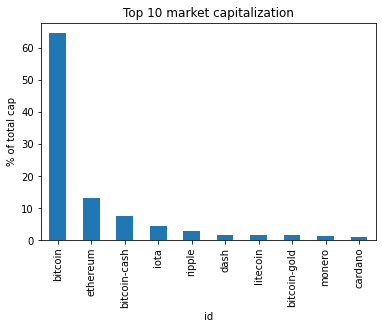

In [18]:
ax = cap10.market_cap_perc.plot.bar()
plt.title('Top 10 market capitalization')
plt.ylabel('% of total cap')
plt.show()

## 4- Making the plot easier to read and more informative

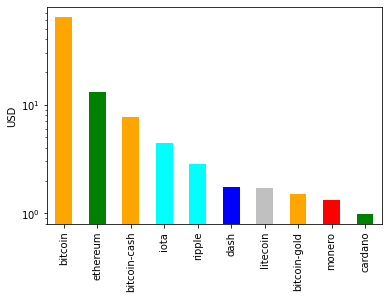

In [19]:
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']


ax = cap10.market_cap_perc.plot.bar(logy=True,color=COLORS)
plt.ylabel('USD')
plt.xlabel('')
plt.show()

## 5- Selecting 24 hours and 7 days percentage change

In [20]:
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

volatility = volatility.set_index('id').dropna()

volatility = volatility.sort_values('percent_change_24h',ascending=True)

In [21]:
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


### 6- Top 10 biggest gainers and top 10 losers in market capitalization

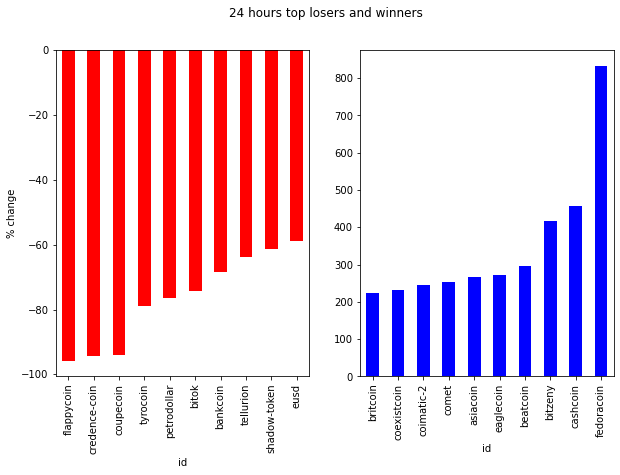

In [22]:
def top10_subplot(volatility_series, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    ax = volatility_series[:10].plot.bar(color='red',ax=axes[0])
    
    fig.suptitle(title)
    ax.set_ylabel('% change')
    
    ax = volatility_series[-10:].plot.bar(color='blue',ax=axes[1])
    
    return fig , ax

ifg, ax = top10_subplot(volatility.percent_change_24h,"24 hours top losers and winners")

plt.show()

## 7- Weekly top 10 biggest gainers and top 10 losers

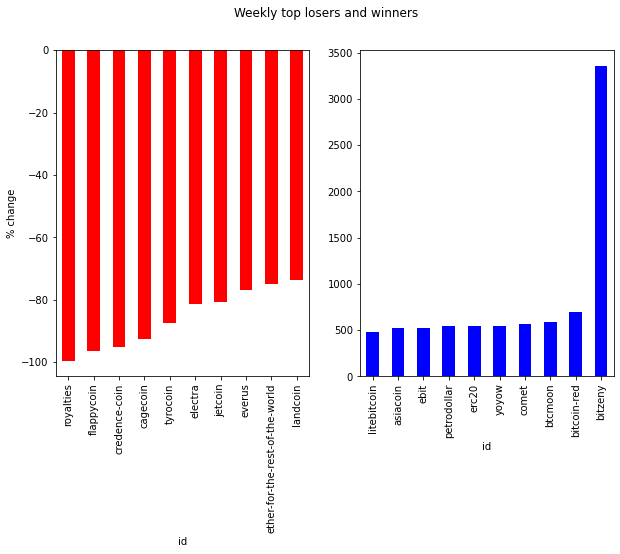

In [23]:
volatility7d = volatility.sort_values(by="percent_change_7d")

fig, ax = top10_subplot(volatility7d.percent_change_7d,"Weekly top losers and winners")

## 8- Selecting everything bigger than 10 billion 

In [24]:
largecaps = cap.query('market_cap_usd > 1E+10')

largecaps

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


## 9- Most Coins are Tiny

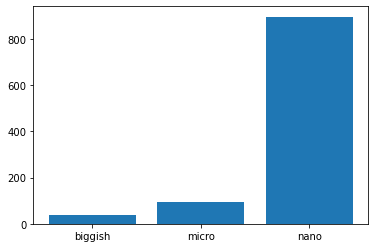

In [25]:
def capcount(query_string):
    return cap.query(query_string).count().id

LABELS = ["biggish", "micro", "nano"]

biggish = capcount('market_cap_usd > 3E+8')

micro = capcount('market_cap_usd >= 5E+7 & market_cap_usd < 3E+8')

nano = capcount('market_cap_usd < 5E+7')

values = [biggish,micro,nano]

plt.bar(range(len(values)),values,tick_label = LABELS)
plt.show()